In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from kaggle.api.kaggle_api_extended import KaggleApi

import warnings

In [2]:
# Игнорирование предупреждений
warnings.filterwarnings('ignore')

In [3]:
root_dir = os.getcwd()

kaggle_data_set = 'henrysue/online-shoppers-intention'

dataset_dir = 'dataset'
dataset_name = 'online_shoppers_intention.csv'
dataset_path = os.path.join(root_dir, dataset_dir, dataset_name)

separator = f'\n\b{'-'*60}\n\b'

In [4]:
def load_data_csv(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        raise Exception(e)

In [5]:
def load_kaggle_data_set(dataset):
    """
    Загрузка датасета из kaggle.

    Важно: Необходимо предварительно получить API Token.
    Переместите файл kaggle.json в папку ~/.kaggle/ (для Linux и macOS)
    или в C:/Users/<Ваше_имя_пользователя>/.kaggle/ (для Windows).
    Если папка .kaggle не существует, нужно ее создать.
    :param dataset:
    :return:
    """

    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset=dataset,
                               path=f'./{dataset_dir}',
                               force=True,
                               unzip=True)              # Загрузка и распаковка датасета

In [6]:
try:
    if not os.path.exists(dataset_path):
        load_kaggle_data_set(kaggle_data_set)       # Загрузка файла датасета из kaggle если он не загружен
    df = load_data_csv(dataset_path)                # Загрузка файла в датафрейм
except Exception as e:
    raise Exception (f'При выполнении произошла ошибка: {e}')

In [7]:
# Экспорт датасета в Exel если не был создан ранее (для удобства просмотра датасета)
dataset_exel = os.path.join(root_dir, 'dataset.xlsx')
if not os.path.isfile(dataset_exel):
    df.to_excel(dataset_exel, index=False)

In [8]:
# Информация о датафрейме (датасете)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
# Отсутствующие значения в столбцах датафрейма. Можно посмотреть и в информации, но так более наглядно.
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# Вывод информации о дубликатах
print(separator, 'Количество дублирующихся значений: ', df.duplicated().sum())


------------------------------------------------------------
 Количество дублирующихся значений:  125


In [11]:
# Очистка от дубликатов записей
df.drop_duplicates(inplace=True)

In [12]:
# Базовые статистики
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
# Преобразование типов данных в числовые значения для возможности их обработки
df['Month'] = df['Month'].map({ 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                                    'May': 5, 'June': 6,'Jul': 7, 'Aug': 8,
                                    'Sep': 9, 'Oct': 10,'Nov': 11,'Dec': 12})

In [14]:
df['VisitorType'] = df['VisitorType'].astype('category')
df['Weekend'] = df['Weekend'].astype('category')
df['VisitorType'] = df['VisitorType'].cat.codes
df['Weekend'] = df['Weekend'].astype('int')
df['Revenue'] = df['Revenue'].astype('int')

In [15]:
# Преобразованный дата фрейм
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,2,0,0


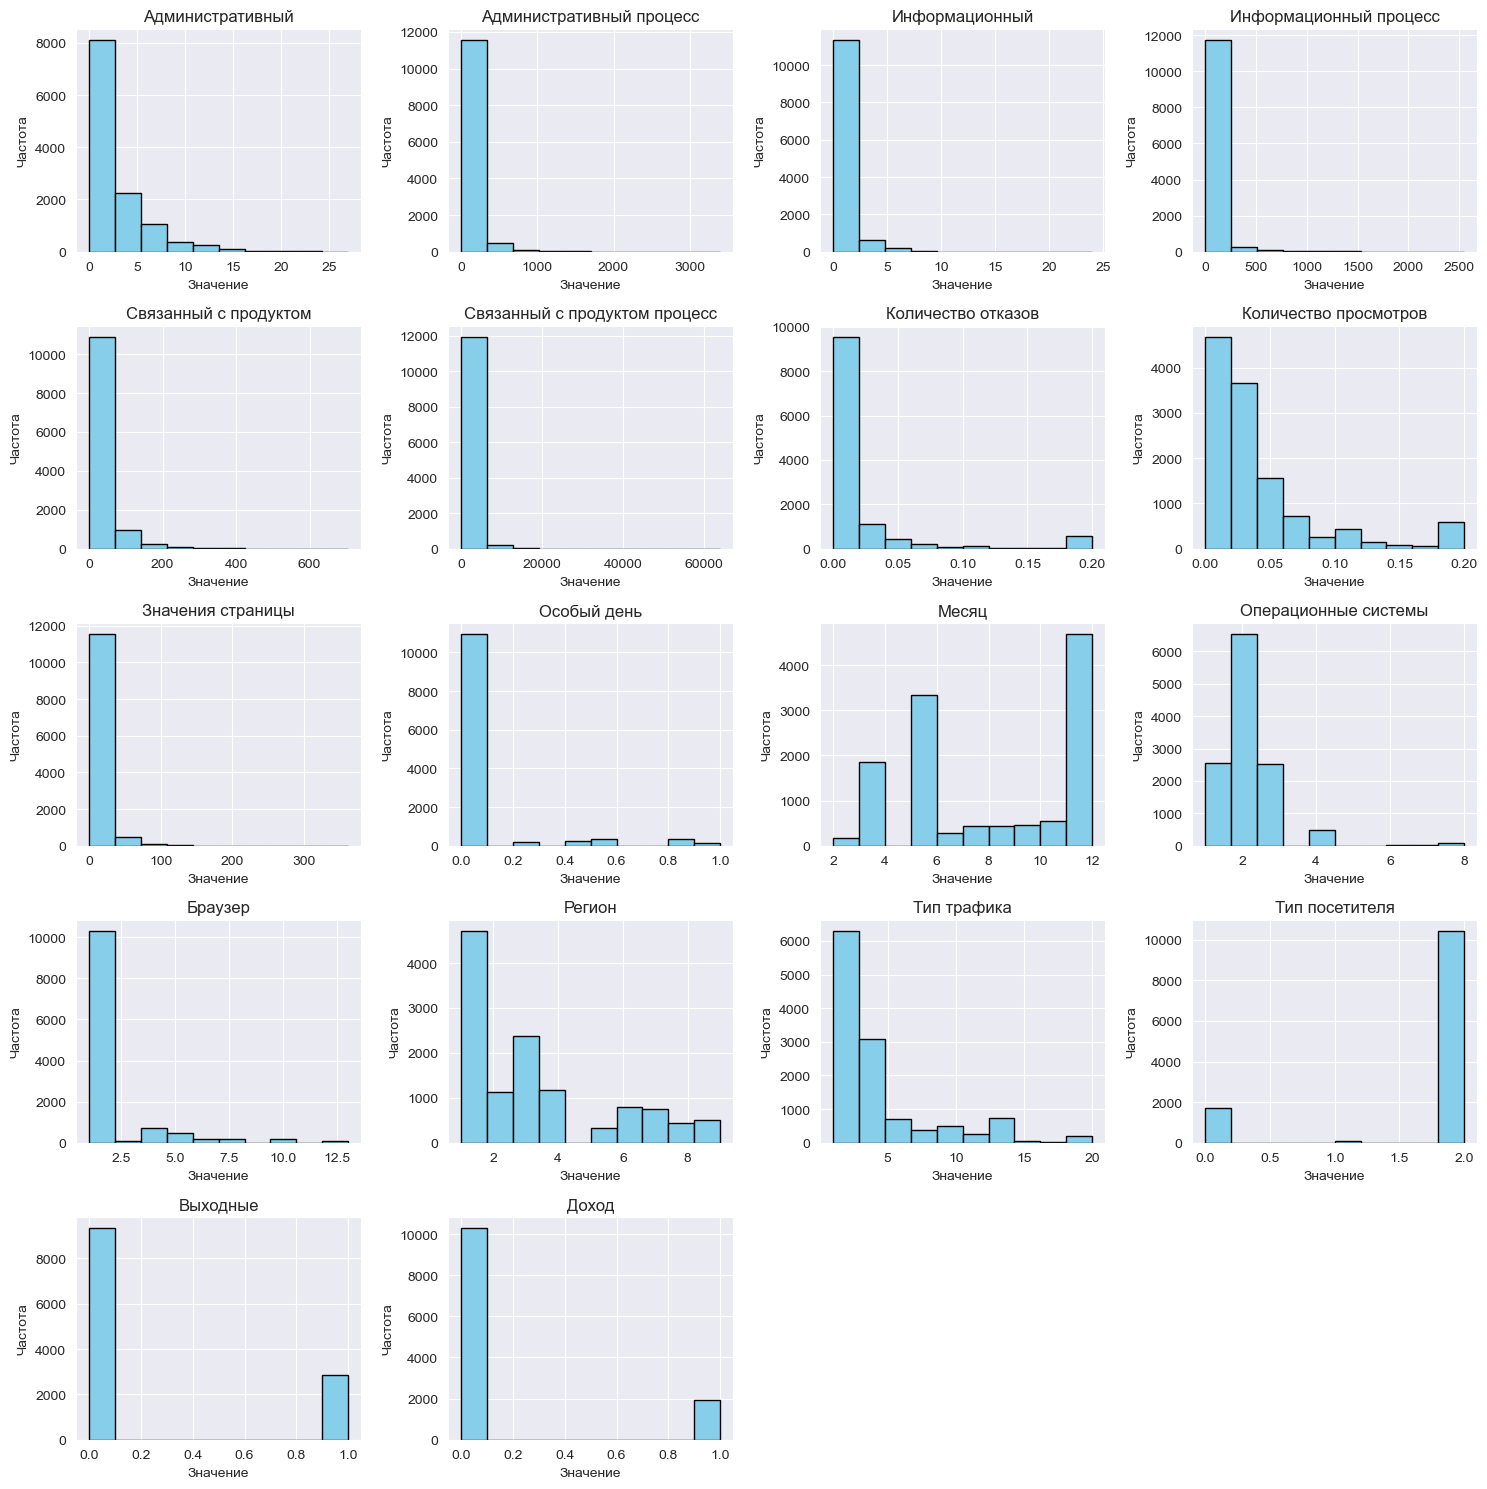

In [16]:
# Гистограммы для каждой переменной
df.hist(figsize=(15, 15), color='skyblue', edgecolor='black')

# Словарь для названий
titles = {
    'Administrative'          : 'Административный',
    'Administrative_Duration' : 'Административный процесс',
    'Informational'           : 'Информационный',
    'Informational_Duration'  : 'Информационный процесс',
    'ProductRelated'          : 'Связанный с продуктом',
    'ProductRelated_Duration' : 'Связанный с продуктом процесс',
    'BounceRates'             : 'Количество отказов',
    'ExitRates'               : 'Количество просмотров',
    'PageValues'              : 'Значения страницы',
    'SpecialDay'              : 'Особый день',
    'Month'                   : 'Месяц',
    'OperatingSystems'        : 'Операционные системы',
    'Browser'                 : 'Браузер',
    'Region'                  : 'Регион',
    'TrafficType'             : 'Тип трафика',
    'VisitorType'             : 'Тип посетителя',
    'Weekend'                : 'Выходные',
    'Revenue'                 : 'Доход'
}
# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    old = ax.get_title()
    new = titles.get(old)
    if old:
        ax.set_title(ax.get_title().replace(old, new))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

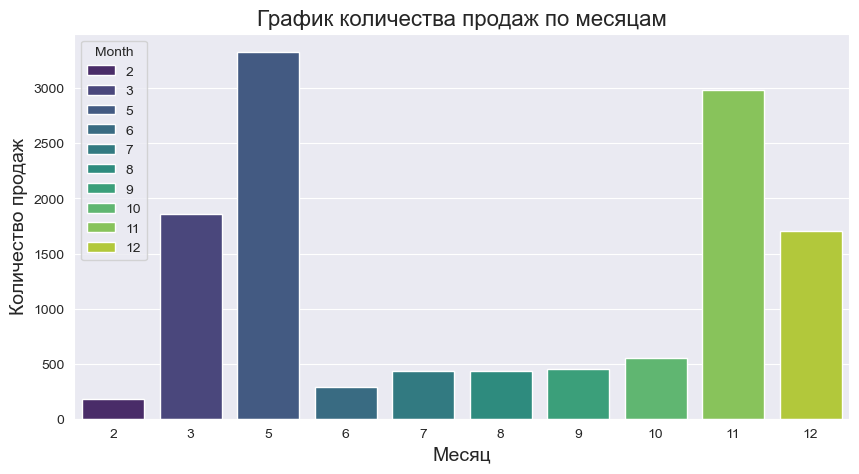

In [17]:
# Посмотрим оказывает ли месяц влияние на продажи и если да, то какое
colors = sns.color_palette('viridis', len(df['Month'].unique()))
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Month', hue='Month', palette=colors)
plt.title('График количества продаж по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.show()

In [18]:
# Наиболее активные продажи в мае, ноябре, марте и декабре.

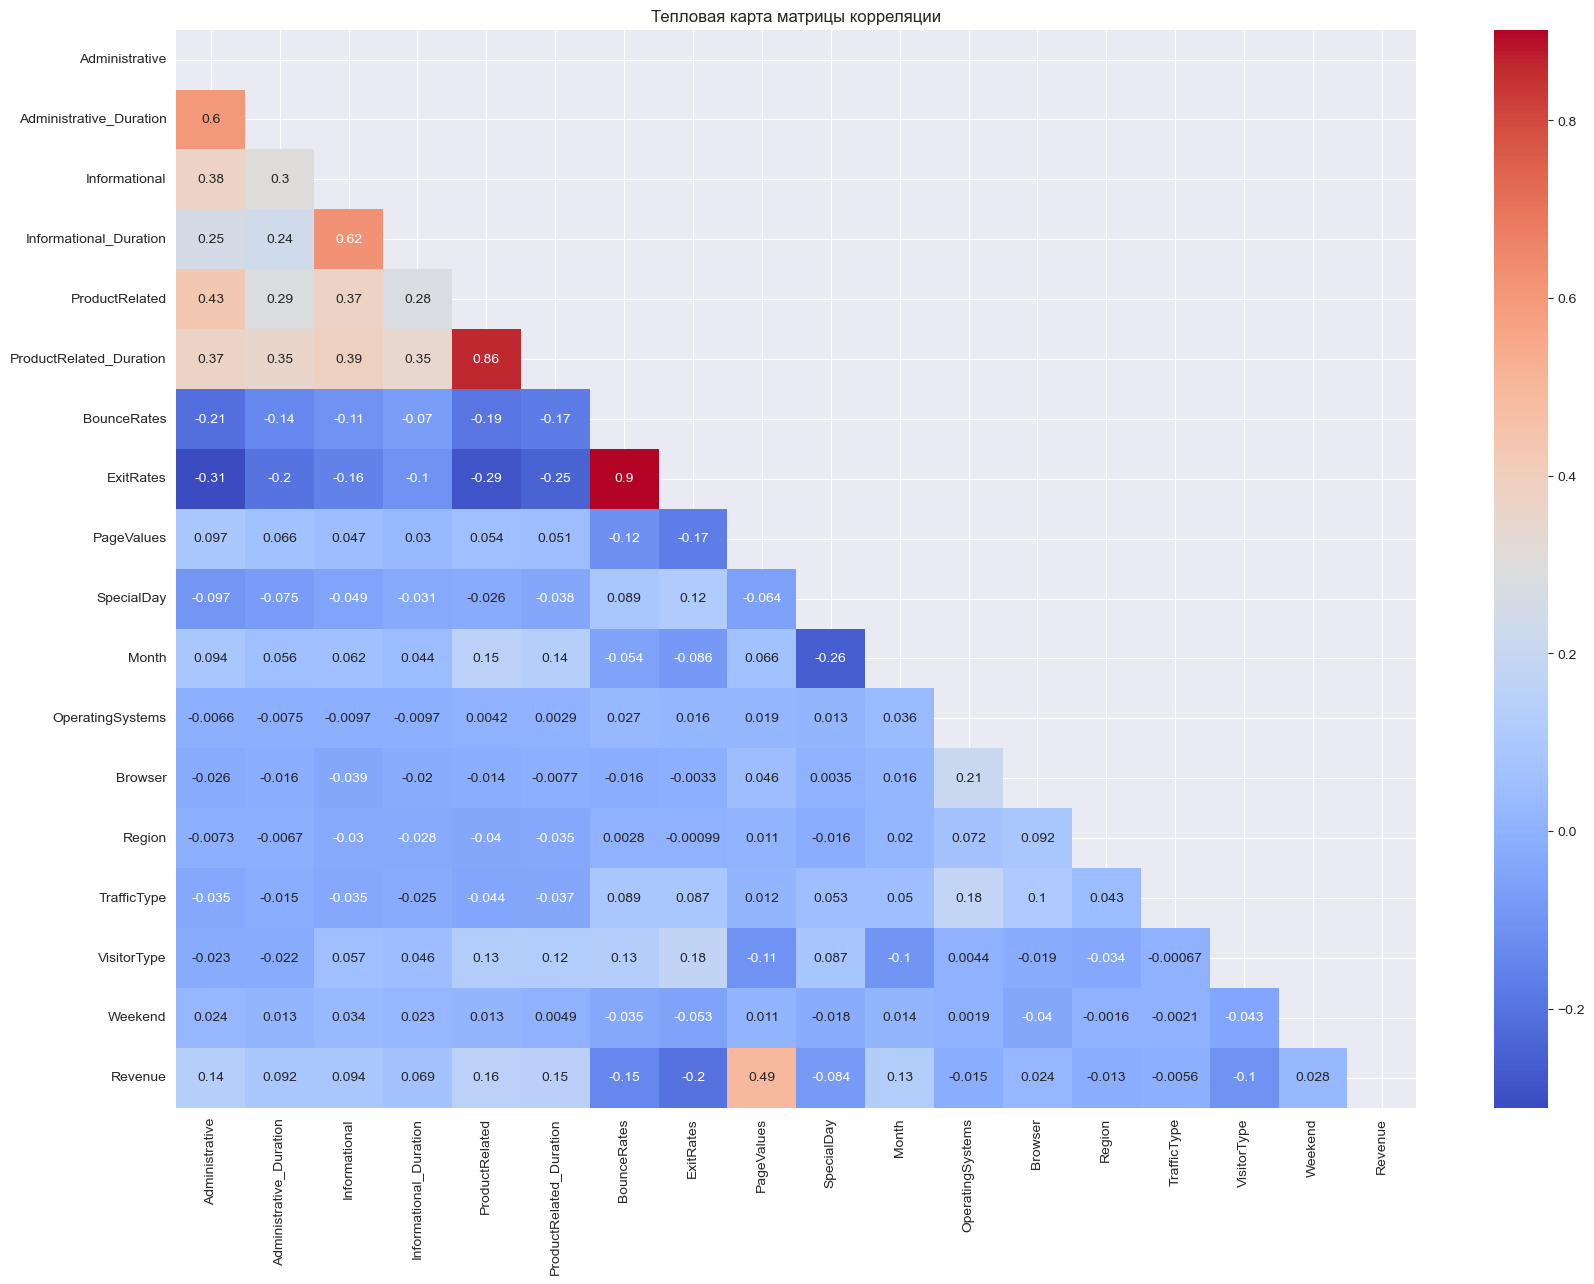

In [19]:
# Посмотрим матрицу корреляции
corr = df.corr()
mask = np.triu(np.ones_like(corr), k=0)

plt.figure(figsize=(20, 14))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Тепловая карта матрицы корреляции')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Разделение на признаки и целевую переменную
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

In [22]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Список итоговых результатов
results = []

In [24]:
# ---------------------------------------------------------
# Реализация классификатора градиентного бустинга (GradientBoostingClassifier)
# ---------------------------------------------------------

# Импорт классификатора градиентного бустинга
from sklearn.ensemble import GradientBoostingClassifier

# Создаю модель
model_gbc = GradientBoostingClassifier(n_estimators=35, learning_rate=0.1, max_depth=3, random_state=42)

# Тренирую модель
model_gbc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_gbc.predict(X_test)

# Отчет классификации
report_gbc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_gbc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_gbc= accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'GradientBoostingClassifier', 'accuracy':accuracy_gbc})

In [25]:
print(separator,'\bДля GradientBoostingClassifier:', separator)
print('Матрица ошибок\n',conf_matrix_gbc)
print(f'\nAccuracy: {accuracy_gbc:.2f}')
print('\nКлассификационный отчет\n',report_gbc, separator)


------------------------------------------------------------
Для GradientBoostingClassifier: 
------------------------------------------------------------

Матрица ошибок
 [[2005   74]
 [ 157  205]]

Accuracy: 0.91

Классификационный отчет
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2079
           1       0.73      0.57      0.64       362

    accuracy                           0.91      2441
   macro avg       0.83      0.77      0.79      2441
weighted avg       0.90      0.91      0.90      2441
 
------------------------------------------------------------



In [26]:
# Определение важности признаков
feature_importances = model_gbc.feature_importances_
features = X.columns

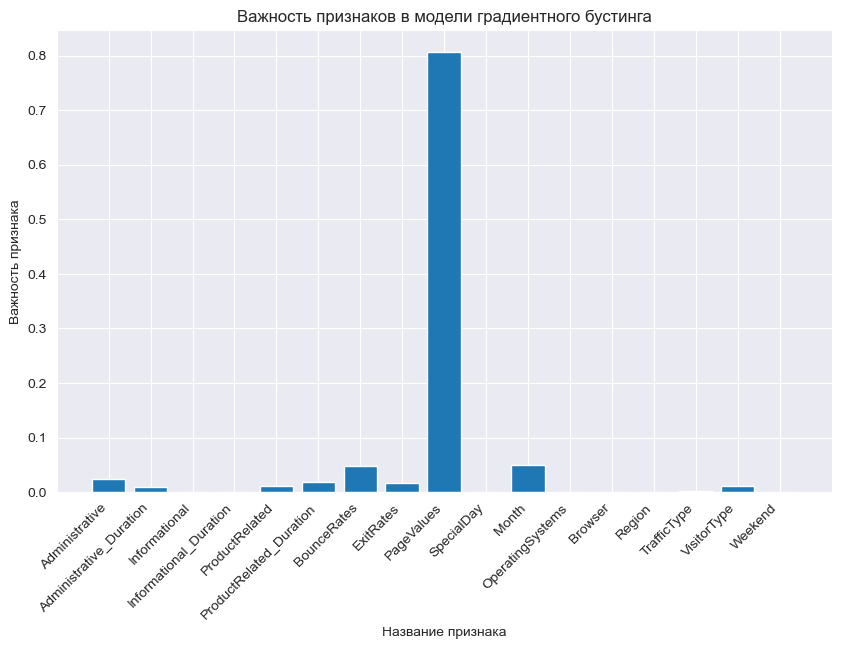

In [27]:
# Визуализация важности признаков градиентного бустинга
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.bar(features, feature_importances)
plt.ylabel('Важность признака')
plt.xlabel('Название признака')
plt.title('Важность признаков в модели градиентного бустинга')
plt.show()

In [28]:
# ---------------------------------------------------------
# Реализация классификатора категориального бустинга (Categorical Boosting)
# ---------------------------------------------------------

# Импорт классификатора CatBoost
from catboost import CatBoostClassifier

# Создаю модель
model_cbc= CatBoostClassifier(iterations=50, learning_rate=0.1, depth=10, random_state=42, verbose=False)

# Тренирую модель
model_cbc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_cbc.predict(X_test)

# Отчет классификации
report_cbc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_cbc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_cbc= accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'CatBoostClassifier', 'accuracy':accuracy_cbc})

In [29]:
print(separator, '\bДля категориального бустинга (Categorical Boosting):', separator)
print('Матрица ошибок\n', conf_matrix_cbc)
print(f'\nAccuracy: {accuracy_cbc:.2f}')
print('\nКлассификационный отчет\n', report_cbc, separator)


------------------------------------------------------------
Для категориального бустинга (Categorical Boosting): 
------------------------------------------------------------

Матрица ошибок
 [[2005   74]
 [ 161  201]]

Accuracy: 0.90

Классификационный отчет
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2079
           1       0.73      0.56      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441
 
------------------------------------------------------------



In [30]:
# ---------------------------------------------------------
# Реализация классификатора адаптивного бустинга AdaBoostClassifier
# ---------------------------------------------------------

# Импорт классификатора AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Создаю модель
model_abc = AdaBoostClassifier(learning_rate=0.1, random_state=42)

# Тренирую модель
model_abc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_abc.predict(X_test)

# Отчет классификации
report_abc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_abc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_abc= accuracy_score(y_test, y_pred)

In [31]:
print(separator, '\bДля адаптивного бустинга (AdaBoostClassifier):', separator)
print('Матрица ошибок\n', conf_matrix_abc)
print(f'\nAccuracy: {accuracy_abc:.2f}')
print('\nКлассификационный отчет\n', report_abc, separator)


------------------------------------------------------------
Для адаптивного бустинга (AdaBoostClassifier): 
------------------------------------------------------------

Матрица ошибок
 [[1980   99]
 [ 173  189]]

Accuracy: 0.89

Классификационный отчет
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2079
           1       0.66      0.52      0.58       362

    accuracy                           0.89      2441
   macro avg       0.79      0.74      0.76      2441
weighted avg       0.88      0.89      0.88      2441
 
------------------------------------------------------------



In [32]:
# ---------------------------------------------------------
# Реализация классификатора ExtraTreesClassifier
# ---------------------------------------------------------

# Импорт классификатора ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Создаю модель
model_etc = ExtraTreesClassifier(n_estimators=60, max_features='sqrt', random_state=42)

# Тренирую модель
model_etc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_etc.predict(X_test)

# Отчет классификации
report_etc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_etc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_etc= accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'ExtraTreesClassifier', 'accuracy':accuracy_etc})

In [33]:
print(separator, '\bДля  (ExtraTreesClassifier):', separator)
print('Матрица ошибок\n', conf_matrix_etc)
print(f'\nAccuracy: {accuracy_etc:.2f}')
print('\nКлассификационный отчет\n', report_etc, separator)


------------------------------------------------------------
Для  (ExtraTreesClassifier): 
------------------------------------------------------------

Матрица ошибок
 [[2028   51]
 [ 196  166]]

Accuracy: 0.90

Классификационный отчет
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2079
           1       0.76      0.46      0.57       362

    accuracy                           0.90      2441
   macro avg       0.84      0.72      0.76      2441
weighted avg       0.89      0.90      0.89      2441
 
------------------------------------------------------------



In [34]:
# ---------------------------------------------------------
# Реализация классификатора квадратичного дискриминантного анализа QuadraticDiscriminantAnalysis
# ---------------------------------------------------------

# Импорт классификатора QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Создаю модель
model_qda = QuadraticDiscriminantAnalysis()

# Тренирую модель
model_qda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_qda.predict(X_test)

# Отчет классификации
report_qda = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_qda = confusion_matrix(y_test, y_pred)

# Точность
accuracy_qda = accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'QuadraticDiscriminantAnalysis', 'accuracy':accuracy_qda})

In [35]:
print(separator, '\bДля  квадратичного дискриминантного анализа  (QuadraticDiscriminantAnalysis):', separator)
print('Матрица ошибок\n', conf_matrix_qda)
print(f'\nAccuracy: {accuracy_qda:.2f}')
print('\nКлассификационный отчет\n', report_qda, separator)


------------------------------------------------------------
Для  квадратичного дискриминантного анализа  (QuadraticDiscriminantAnalysis): 
------------------------------------------------------------

Матрица ошибок
 [[1831  248]
 [ 143  219]]

Accuracy: 0.84

Классификационный отчет
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      2079
           1       0.47      0.60      0.53       362

    accuracy                           0.84      2441
   macro avg       0.70      0.74      0.72      2441
weighted avg       0.86      0.84      0.85      2441
 
------------------------------------------------------------



In [36]:
# ---------------------------------------------------------
# Реализация классификатора Light Gradient Boosting Machine
# ---------------------------------------------------------

# Импорт классификатора lightgbm
import lightgbm as lgb

# Создаю модель
model_lgbmc = lgb.LGBMClassifier(num_leaves=5, learning_rate=0.01, n_estimators=5)

# Тренирую модель
model_lgbmc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_lgbmc.predict(X_test)

# Отчет классификации
report_lgbmc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_lgbmc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_lgbmc = accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'LGBMClassifier', 'accuracy':accuracy_lgbmc})

[LightGBM] [Info] Number of positive: 1546, number of negative: 8218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 9764, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158337 -> initscore=-1.670656
[LightGBM] [Info] Start training from score -1.670656


In [37]:
print(separator, '\bДля (Light Gradient Boosting Machine):', separator)
print('Матрица ошибок\n', conf_matrix_qda)
print(f'\nAccuracy: {accuracy_qda:.2f}')
print('\nКлассификационный отчет\n', report_qda, separator)


------------------------------------------------------------
Для (Light Gradient Boosting Machine): 
------------------------------------------------------------

Матрица ошибок
 [[1831  248]
 [ 143  219]]

Accuracy: 0.84

Классификационный отчет
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      2079
           1       0.47      0.60      0.53       362

    accuracy                           0.84      2441
   macro avg       0.70      0.74      0.72      2441
weighted avg       0.86      0.84      0.85      2441
 
------------------------------------------------------------



In [38]:
# ---------------------------------------------------------
# Реализация классификатора KNeighborsClassifier
# ---------------------------------------------------------

# Импорт классификатора KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Создаю модель
model_knc = KNeighborsClassifier(n_neighbors=6)  # Задаем количество соседей. При k=6 удалось повысить Accuracy до 0.84

# Тренирую модель
model_knc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_knc.predict(X_test)

# Отчет классификации
report_knc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_knc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_knc = accuracy_score(y_test, y_pred)

# Добавлю результат в итоги
results.append({'model':'KNeighborsClassifier', 'accuracy':accuracy_knc})

In [39]:
print(separator, '\bДля K-ближайших (KNeighborsClassifier):', separator)
print('Матрица ошибок\n', conf_matrix_knc)
print(f'\nAccuracy: {accuracy_knc:.2f}')
print('\nКлассификационный отчет\n', report_knc, separator)


------------------------------------------------------------
Для K-ближайших (KNeighborsClassifier): 
------------------------------------------------------------

Матрица ошибок
 [[2041   38]
 [ 286   76]]

Accuracy: 0.87

Классификационный отчет
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2079
           1       0.67      0.21      0.32       362

    accuracy                           0.87      2441
   macro avg       0.77      0.60      0.62      2441
weighted avg       0.85      0.87      0.84      2441
 
------------------------------------------------------------



In [40]:
# ---------------------------------------------------------
# Реализация классификатора DecisionTreeClassifier
# ---------------------------------------------------------

# Импорт классификатора DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Попробую взять только несколько признаков.
# При выборе указанных признаков получил максимум Accuracy = 0.88
sel_cols = [
              # 'Administrative',
              'Administrative_Duration',
              # 'Informational',
              # 'Informational_Duration',
              # 'ProductRelated',
              # 'ProductRelated_Duration',
              # 'BounceRates',
              # 'ExitRates',
              'PageValues',
              # 'SpecialDay',
              'Month',
              # 'OperatingSystems',
              # 'Browser',
              # 'Region',
              # 'TrafficType',
              'VisitorType',
              'Weekend',
              ]
X_dtc_2 = df[sel_cols]
y_dtc_2 = df.Revenue

# Разделение данных на обучающий и тестовый наборы
X_train_dtc_2, X_test_dtc_2, y_train_dtc_2, y_test_dtc_2 = train_test_split(X_dtc_2, y_dtc_2, test_size=0.2, random_state=42)

# Создаю модель
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc_2 = DecisionTreeClassifier(random_state=42)

# Тренирую модель
model_dtc.fit(X_train, y_train)
model_dtc_2.fit(X_train_dtc_2, y_train_dtc_2)

# Предсказание на тестовой выборке
y_pred = model_dtc.predict(X_test)
y_pred_dtc_2 = model_dtc_2.predict(X_test_dtc_2)

# Отчет классификации
report_dtc = classification_report(y_test, y_pred)
report_dtc_2 = classification_report(y_test_dtc_2, y_pred_dtc_2)

# Матрица ошибок
conf_matrix_dtc = confusion_matrix(y_test, y_pred)
conf_matrix_dtc_2 = confusion_matrix(y_test_dtc_2, y_pred_dtc_2)

# Точность
accuracy_dtc = accuracy_score(y_test, y_pred)
accuracy_dtc_2 = accuracy_score(y_test_dtc_2, y_pred_dtc_2)

# Добавлю в итоги только результат полученный при выбранных полях, т.к. его accuracy выше
results.append({'model':'DecisionTreeClassifier', 'accuracy':accuracy_dtc_2})

In [41]:
print(separator, '\bДля (DecisionTreeClassifier):', separator)
print('Матрица ошибок при выборе всех полей\n', conf_matrix_dtc)
print(f'Матрица ошибок при выборе полей {sel_cols}\n', conf_matrix_dtc_2)
print(f'\nAccuracy при выборе всех полей: {accuracy_dtc:.2f}')
print(f'\nAccuracy:при выборе отдельных полей {accuracy_dtc_2:.2f}')
print('\nКлассификационный отчет при выборе всех полей\n', report_dtc, separator)
print(f'\nКлассификационный отчет\n', report_dtc_2, separator)


------------------------------------------------------------
Для (DecisionTreeClassifier): 
------------------------------------------------------------

Матрица ошибок при выборе всех полей
 [[1895  184]
 [ 158  204]]
Матрица ошибок при выборе полей ['Administrative_Duration', 'PageValues', 'Month', 'VisitorType', 'Weekend']
 [[1937  142]
 [ 160  202]]

Accuracy при выборе всех полей: 0.86

Accuracy:при выборе отдельных полей 0.88

Классификационный отчет при выборе всех полей
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2079
           1       0.53      0.56      0.54       362

    accuracy                           0.86      2441
   macro avg       0.72      0.74      0.73      2441
weighted avg       0.86      0.86      0.86      2441
 
------------------------------------------------------------


Классификационный отчет
               precision    recall  f1-score   support

           0       0.92      0.93      0.93 

In [42]:
# ---------------------------------------------------------
# Реализация классификатора экстремального градиентного бустинга (XGBClassifier)
# ---------------------------------------------------------

# Импорт классификатора XGBClassifier
import xgboost as xgb

# Создаю модель
model_xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Тренирую модель
model_xgbc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_xgbc.predict(X_test)

# Отчет классификации
report_xgbc = classification_report(y_test, y_pred)

# Матрица ошибок
conf_matrix_xgbc = confusion_matrix(y_test, y_pred)

# Точность
accuracy_xgbc= accuracy_score(y_test, y_pred)

# Добавлю в итоги результат
results.append({'model':'XGBClassifier', 'accuracy':accuracy_xgbc})

In [43]:
print(separator, '\bДля классификатора экстремального градиентного бустинга (XGBClassifier):', separator)
print('Матрица ошибок\n', conf_matrix_xgbc)
print(f'\nAccuracy: {accuracy_xgbc:.2f}')
print('\nКлассификационный отчет\n', report_xgbc, separator)


------------------------------------------------------------
Для классификатора экстремального градиентного бустинга (XGBClassifier): 
------------------------------------------------------------

Матрица ошибок
 [[1983   96]
 [ 162  200]]

Accuracy: 0.89

Классификационный отчет
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2079
           1       0.68      0.55      0.61       362

    accuracy                           0.89      2441
   macro avg       0.80      0.75      0.77      2441
weighted avg       0.89      0.89      0.89      2441
 
------------------------------------------------------------



In [44]:
# ---------------------------------------------------------
# Реализация фиктивного классификатора (DummyClassifier)
# с параметрами uniform, stratified
# ---------------------------------------------------------

# Импорт классификатора DummyClassifier
from sklearn.dummy import DummyClassifier

# Создаю модель
model_dc_uniform = DummyClassifier(strategy="uniform")
model_dc_stratified = DummyClassifier(strategy="stratified")

# Тренирую модель
model_dc_uniform.fit(X_train, y_train)
model_dc_stratified.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_uniform = model_dc_uniform.predict(X_test)
y_pred_stratified = model_dc_stratified.predict(X_test)

# Отчет классификации
report_dc_uniform = classification_report(y_test, y_pred_uniform)
report_dc_stratified = classification_report(y_test, y_pred_stratified)

# Матрица ошибок
conf_matrix_dc_uniform = confusion_matrix(y_test, y_pred_uniform)
conf_matrix_dc_stratified = confusion_matrix(y_test, y_pred_stratified)

# Точность
accuracy_dc_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_dc_stratified = accuracy_score(y_test, y_pred_stratified)

# Добавлю в итоги только результат полученный при strategy="stratified", т.к. его accuracy выше
results.append({'model':'DummyClassifier', 'accuracy':accuracy_dc_stratified})

In [45]:
print(separator, '\bДля фиктивного классификатора (DummyClassifier):', separator)
print('Матрица ошибок с параметром uniform\n', conf_matrix_dc_uniform)
print('Матрица ошибок с параметром stratified\n', conf_matrix_dc_stratified)
print(f'\nAccuracy с параметром uniform: {accuracy_dc_uniform:.2f}')
print(f'\nAccuracy с параметром stratified: {accuracy_dc_stratified:.2f}')
print('\nКлассификационный отчет с параметром uniform\n', report_dc_uniform)
print('\nКлассификационный отчет с параметром uniform\n', report_dc_stratified, separator)


------------------------------------------------------------
Для фиктивного классификатора (DummyClassifier): 
------------------------------------------------------------

Матрица ошибок с параметром uniform
 [[1013 1066]
 [ 180  182]]
Матрица ошибок с параметром stratified
 [[1770  309]
 [ 305   57]]

Accuracy с параметром uniform: 0.49

Accuracy с параметром stratified: 0.75

Классификационный отчет с параметром uniform
               precision    recall  f1-score   support

           0       0.85      0.49      0.62      2079
           1       0.15      0.50      0.23       362

    accuracy                           0.49      2441
   macro avg       0.50      0.50      0.42      2441
weighted avg       0.74      0.49      0.56      2441


Классификационный отчет с параметром uniform
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2079
           1       0.16      0.16      0.16       362

    accuracy                     

In [46]:
# ---------------------------------------------------------
# Реализация классификатора SVM - линейное ядро.
# ---------------------------------------------------------

# Импорт классификатора SVC
from sklearn.svm import SVC

# Создаю модели
model_svc_poly =  SVC(kernel='poly', random_state=42) # Полиномиальное ядро (Polynomial Kernel) создает границы разделения, которые могут быть более сложными, чем линейные, но менее гибкими, чем у RBF
model_svc_rbf =  SVC(kernel='rbf', random_state=42) # Ядро RBF (Radial Basis Function) создает гладкие, не линейные границы разделения.

# Тренирую модели
model_svc_poly.fit(X_train, y_train)
model_svc_rbf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_svc_poly = model_svc_poly.predict(X_test)
y_pred_svc_rbf = model_svc_rbf.predict(X_test)

# Отчет классификации
report_svc_poly = classification_report(y_test, y_pred_svc_poly)
report_svc_rbf = classification_report(y_test, y_pred_svc_rbf)

# Матрица ошибок
conf_matrix_svc_poly = confusion_matrix(y_test, y_pred_svc_poly)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

# Точность
accuracy_svc_poly = accuracy_score(y_test, y_pred_svc_poly)
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)

# Добавлю в итоги только результат полученный при kernel='poly', т.к. оба accuracy одинаковые
results.append({'model':'LinearSVM', 'accuracy':accuracy_svc_poly})

In [47]:
print(separator, '\bДля классификатора SVM - линейное ядро (SVC):', separator)
print('Матрица ошибок с параметром kernel="poly"\n', conf_matrix_svc_poly)
print('Матрица ошибок с параметром kernel="rbf"\n', conf_matrix_svc_rbf)
print(f'\nAccuracy с параметром kernel="poly": {accuracy_svc_poly:.2f}')
print(f'\nAccuracy с параметром kernel="rbf": {accuracy_svc_rbf:.2f}')
print('\nКлассификационный отчет с параметром kernel="poly"\n', report_svc_poly)
print('\nКлассификационный отчет с параметром kernel="rbf"\n', report_svc_rbf, separator)


------------------------------------------------------------
Для классификатора SVM - линейное ядро (SVC): 
------------------------------------------------------------

Матрица ошибок с параметром kernel="poly"
 [[2075    4]
 [ 358    4]]
Матрица ошибок с параметром kernel="rbf"
 [[2077    2]
 [ 355    7]]

Accuracy с параметром kernel="poly": 0.85

Accuracy с параметром kernel="rbf": 0.85

Классификационный отчет с параметром kernel="poly"
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2079
           1       0.50      0.01      0.02       362

    accuracy                           0.85      2441
   macro avg       0.68      0.50      0.47      2441
weighted avg       0.80      0.85      0.79      2441


Классификационный отчет с параметром kernel="rbf"
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2079
           1       0.78      0.02      0.04       362

    accur

In [48]:
# Вывод: оба ядра показали практически одинаковые результаты

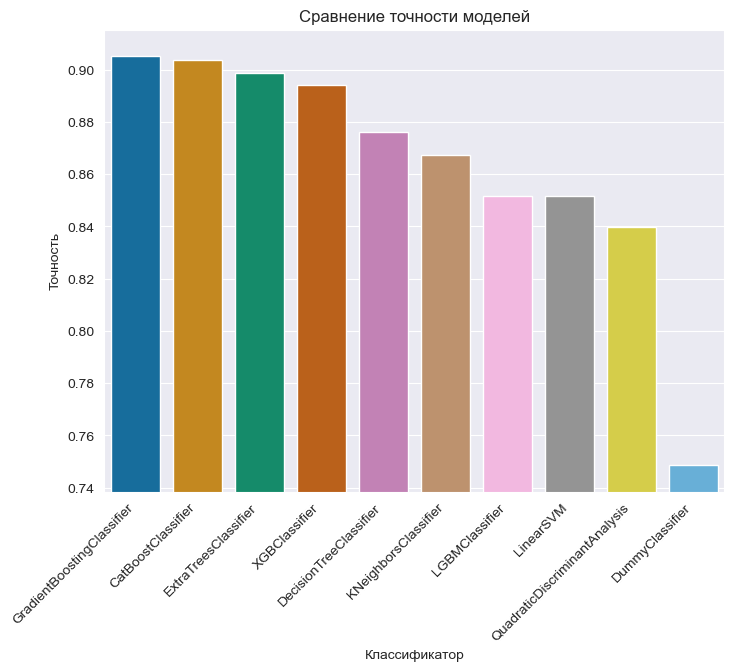

In [52]:
# Визуализация сравнения точности моделей
accuracy_df = pd.DataFrame.from_records(results)
accuracy_df = accuracy_df.sort_values(by='accuracy', ascending=False)   # Отсортирую критерии по убыванию их accuracy
accuracy_df = accuracy_df.reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.model, y=accuracy_df.accuracy, palette='colorblind')

y_min = accuracy_df['accuracy'].min() - 0.01 # Выбрал минимальное и добавил 0.1, чтобы не пропало на визуализации
y_max = accuracy_df['accuracy'].max() + 0.01 # Выбрал максимальное и добавил 0.1, чтобы при визуализации столбцы не упиралась в потолок
plt.ylim(y_min, y_max)                       # Устанвка шкалы для оси y

plt.ylabel('Точность')
plt.xlabel('Классификатор')
plt.title('Сравнение точности моделей')
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:
accuracy_df

,index,model,accuracy
0,0,GradientBoostingClassifier,0.905367
1,1,CatBoostClassifier,0.903728
2,2,ExtraTreesClassifier,0.898812
3,7,XGBClassifier,0.894306
4,6,DecisionTreeClassifier,0.876280
5,5,KNeighborsClassifier,0.867268
6,4,LGBMClassifier,0.851700
7,9,LinearSVM,0.851700
8,3,QuadraticDiscriminantAnalysis,0.839820
9,8,DummyClassifier,0.748464


In [51]:
"""
Вывод:
Для данного датасета:
 - наиболее эффективным классификатором для предсказания будет ли посетитель совершать покупку, является CatBoostClassifier.
 - наименее эффективным классификатором для предсказания будет ли посетитель совершать покупку, является DummyClassifier.
"""

'\nВывод:\nДля данного датасета:\n - наиболее эффективным классификатором для предсказания будет ли посетитель совершать покупку, является CatBoostClassifier.\n - наименее эффективным классификатором для предсказания будет ли посетитель совершать покупку, является DummyClassifier.\n'